In [1]:
#!pip install --upgrade jax jaxlib flax

import jax
import jax.numpy as jnp
from flax import linen as nn
from flax.training import train_state
import optax
import matplotlib.pyplot as plt
from tqdm import tqdm

We define a complex MLP

In [2]:
# Define the model
class SimpleNN(nn.Module):
  def setup(self):
    self.dense1 = nn.Dense(features=32)
    self.dense2 = nn.Dense(features=2)

  def __call__(self, x):
    x = self.dense1(x)
    x = nn.gelu(x)
    x = self.dense2(x)
    return x

# Learning Functions over Projective Spaces

Projective spaces are defined by:
$$
\mathbb{P}_n = \frac{\mathbb{C}^{n+1} - \{\vec{0}\}}{\mathbb{C}^\ast}
$$

That is, we consider $(\mathbb{C}^{n+1})$, remove the origin, and identify up to a non-zero complex rescaling $(\vec{z} \sim \lambda \vec{z})$, with $(\vec{z} \in \mathbb{C}^{n+1} - \{\vec{0}\})$ and $\
\lambda \in \mathbb{C}^\ast)$.

A function over projective space is required to be invariant under projective rescalings:
$$
f(\vec{z}) = f(\lambda \vec{z}) \quad \forall \vec{z}, \lambda
$$

In [3]:
import pickle
with open("funcData.pkl", "rb") as f:
    inputs, outputs = pickle.load(f)

print(inputs[0],outputs[0])

[ 0.19395497 -1.7570837  -0.00396011 -0.44197065] [ 0.00411469 -0.01375523]


This data set is for a function on $\mathbb{P}_1$, and outputs a complex number $x+iy$, represented by $[x,y]$. The input is listed as $[\text{Re}(Z_0), \text{Re}(Z_1), \text{Im}(Z_0), \text{Im}(Z_1)]$.

100%|██████████| 1000/1000 [00:01<00:00, 770.17it/s]


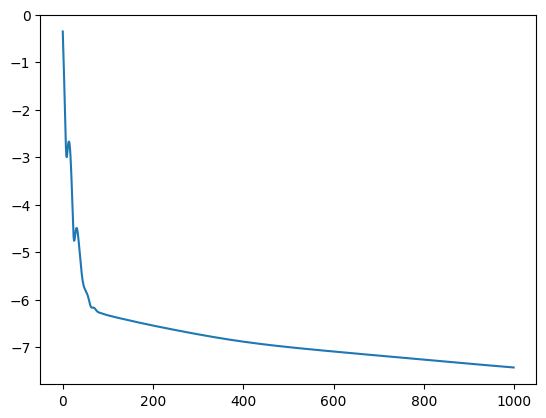

In [4]:
# Generate some training data
key = jax.random.PRNGKey(0)
x_train = inputs
y_train = outputs

# Initialise the model and optimiser
model = SimpleNN()
params = model.init(jax.random.PRNGKey(1), x_train)
optimiser = optax.adam(learning_rate=0.01)
my_state = train_state.TrainState.create(
    apply_fn=model.apply,
    params=params,
    tx=optimiser)

# Define the loss function
def loss_fn(params, x, y):
  y_pred = model.apply(params, x)
  loss = jnp.mean((y_pred - y) ** 2)
  return loss

# Define the training step
@jax.jit
def train_step(state, x, y):
  grad_fn = jax.value_and_grad(loss_fn)
  loss, grads = grad_fn(state.params, x, y)
  state = state.apply_gradients(grads=grads)
  return state, loss

# Train the model
loss = []
for i in tqdm(range(1000)):
  my_state, l = train_step(my_state, x_train, y_train)
  loss.append(jnp.log(l))

plt.plot(loss)
plt.show()

**Exercise:**

1. Check how close this NN is to being invariant under the projective rescaling.
2. Try to design a NN that is invariant under this projective rescaling.
3. Train that NN on the dataset, and compare the results.

# Learning Sections of Line Bundles over Projective Spaces

We can learn sections of line bundles over projective spaces—don't worry if you don't know what a line bundle is.

For $\mathbb{P}_1$, we label a line bundle as $O(k)$, with $k \in \mathbb{Z}$.

A section of this line bundle transforms under projective rescalings as:
$$
\sigma(\lambda \vec{Z}) = \lambda^{k_4} \sigma(\vec{Z})
$$

In [5]:
import pickle
with open("sectData.pkl", "rb") as f:
    inputs, outputs = pickle.load(f)

print(inputs[0],outputs[0])


[ 1.1597246   1.2696937  -0.55691326  0.20402706] [ 0.01320018 -0.08154175]


This dataset is for a section of $O(2)$.

The input is listed the same as last time, and the output is $[\text{Re}(\sigma), \text{Im}(\sigma)]$.

Let's train a NN to learn this section.

100%|██████████| 1000/1000 [00:01<00:00, 692.98it/s]


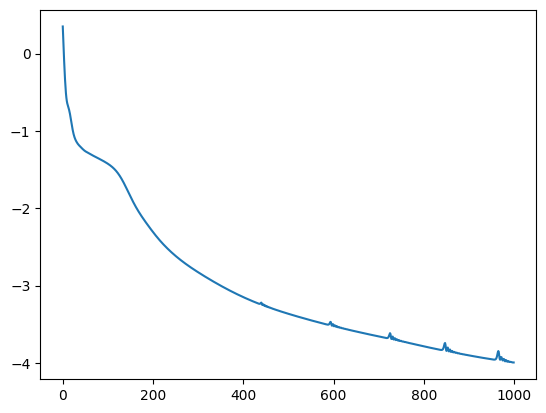

In [6]:
# Generate some training data
key = jax.random.PRNGKey(0)
x_train = inputs
y_train = outputs

# Initialise the model and optimiser
model = SimpleNN()
params = model.init(jax.random.PRNGKey(1), x_train)
optimiser = optax.adam(learning_rate=0.01)
my_state = train_state.TrainState.create(
    apply_fn=model.apply,
    params=params,
    tx=optimiser)

# Define the loss function
def loss_fn(params, x, y):
  y_pred = model.apply(params, x)
  loss = jnp.mean((y_pred - y) ** 2)
  return loss

# Define the training step
@jax.jit
def train_step(state, x, y):
  grad_fn = jax.value_and_grad(loss_fn)
  loss, grads = grad_fn(state.params, x, y)
  state = state.apply_gradients(grads=grads)
  return state, loss

# Train the model
loss = []
for i in tqdm(range(1000)):
  my_state, l = train_step(my_state, x_train, y_train)
  loss.append(jnp.log(l))

plt.plot(loss)
plt.show()

**Exercise:**

1. Check how close this NN is to being invariant under the projective rescaling.
2. Try to design a NN that is appropriately equivariant under this projective rescaling.
3. Train that NN on the dataset, and compare the results.